In [78]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

## Understanding the Raw Data

In [79]:
df_2024 = pd.read_csv("../01_raw_data/ttc-subway-delay-data-2024.csv")

df_2025 = pd.read_csv("../01_raw_data/TTC Subway Delay Data since 2025.csv")

df_2025 = df_2025.drop(columns='_id')
#Dates
df_2024['Date'] = pd.to_datetime(df_2024['Date'])
df_2025['Date'] = pd.to_datetime(df_2025['Date'], format='%Y-%m-%d')
df_2024["Time"] = pd.to_datetime(df["Time"], format="%H:%M")
df_2025["Time"] = pd.to_datetime(df["Time"], format="%H:%M")

#Combined data frame

df = pd.concat([df_2024, df_2025], ignore_index=True)

#Droping

In [80]:
df.shape

(28571, 10)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28571 entries, 0 to 28570
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       28571 non-null  datetime64[ns]
 1   Time       28569 non-null  datetime64[ns]
 2   Day        28571 non-null  object        
 3   Station    28571 non-null  object        
 4   Code       28571 non-null  object        
 5   Min Delay  27275 non-null  float64       
 6   Min Gap    27230 non-null  float64       
 7   Bound      18329 non-null  object        
 8   Line       28522 non-null  object        
 9   Vehicle    27754 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(5)
memory usage: 2.2+ MB


In [82]:
#Sum of Null Values
df.isnull().sum()

Date             0
Time             2
Day              0
Station          0
Code             0
Min Delay     1296
Min Gap       1341
Bound        10242
Line            49
Vehicle        817
dtype: int64

In [83]:
df.describe()

,Date,Time,Min Delay,Min Gap,Vehicle
count,28571,28569,27275.000000,27230.000000,27754.000000
mean,2024-07-16 12:31:22.468237312,1900-01-01 13:28:08.545626368,2.957104,4.328351,3330.882539
min,2024-01-01 00:00:00,1900-01-01 00:00:00,0.000000,0.000000,0.000000
25%,2024-04-08 00:00:00,1900-01-01 08:29:00,0.000000,0.000000,0.000000
50%,2024-07-18 00:00:00,1900-01-01 14:10:00,0.000000,0.000000,5144.000000
75%,2024-10-24 00:00:00,1900-01-01 18:49:00,4.000000,8.000000,5621.000000
max,2025-01-31 00:00:00,1900-01-01 23:59:00,716.000000,719.000000,9546.000000
std,NaN,NaN,10.304557,11.079958,2727.699015


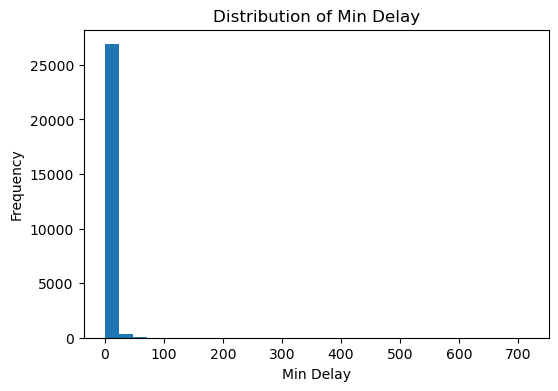

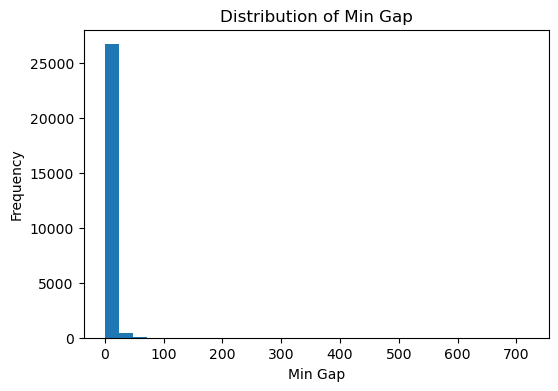

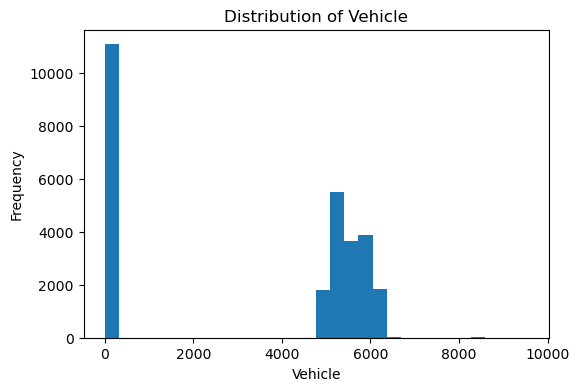

In [84]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col].dropna(), bins=30)  # We drop NaNs before plotting
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {col}")
    plt.show()

In [85]:
df['Line'].unique()

array(['YU', 'BD', 'YUS', 'YU/BD', 'SHP', nan, 'BLOOR DANFORTH',
       'YU / BD', 'YU/ BD', 'SRT', 'YUS/BD', 'SHEP', 'LINE 1',
       'TRACK LEVEL ACTIVITY', 'YU & BD', '109 RANEE',
       'ONGE-UNIVERSITY AND BL', 'YU/BD/SHP', 'BD/ YUS', 'BD/ YU',
       'BD/YU', 'BD / YU', '20 CLIFFSIDE'], dtype=object)

In [86]:
df_codes = pd.read_csv("./code_category_description.csv")

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28571 entries, 0 to 28570
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       28571 non-null  datetime64[ns]
 1   Time       28569 non-null  datetime64[ns]
 2   Day        28571 non-null  object        
 3   Station    28571 non-null  object        
 4   Code       28571 non-null  object        
 5   Min Delay  27275 non-null  float64       
 6   Min Gap    27230 non-null  float64       
 7   Bound      18329 non-null  object        
 8   Line       28522 non-null  object        
 9   Vehicle    27754 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(5)
memory usage: 2.2+ MB


## Processing

In [88]:
# Cleaning Null Values

df = df.dropna(subset=['Min Delay'])
df = df.dropna(subset=['Min Gap'])
# Removing SRT Line (Out of Scope)

df = df[df['Line'] != 'SRT']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27228 entries, 0 to 28570
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       27228 non-null  datetime64[ns]
 1   Time       27228 non-null  datetime64[ns]
 2   Day        27228 non-null  object        
 3   Station    27228 non-null  object        
 4   Code       27228 non-null  object        
 5   Min Delay  27228 non-null  float64       
 6   Min Gap    27228 non-null  float64       
 7   Bound      17702 non-null  object        
 8   Line       27184 non-null  object        
 9   Vehicle    27224 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(5)
memory usage: 2.3+ MB


In [89]:
# Exporting csv file

#df.to_csv("df_delays.csv",index =False)

In [90]:
# Sub-divide observations with Delays and 0 Delays

df_delay = df[df['Min Delay'] > 0]  # Contains rows where delay is greater than 0
df_no_delay = df[df['Min Delay'] == 0]  # Contains rows where delay is exactly 0



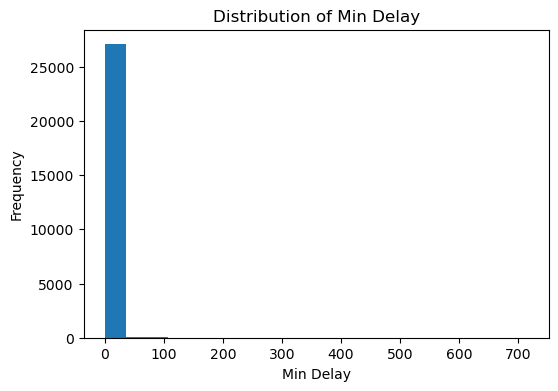

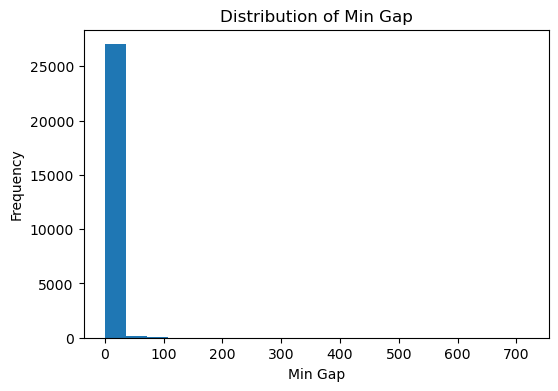

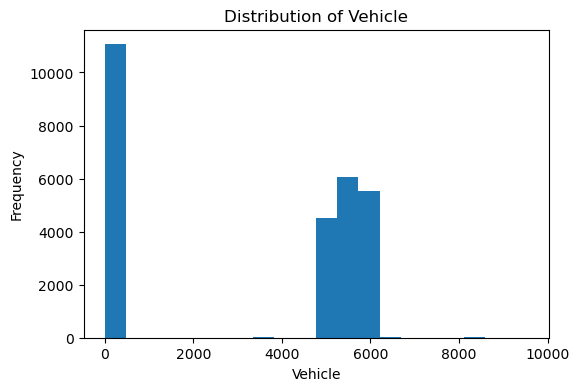

In [91]:
numeric_cols = df_delay.select_dtypes(include=["int64", "float64"]).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col].dropna(), bins=20)  # We drop NaNs before plotting
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {col}")
    plt.show()

<Axes: ylabel='Frequency'>

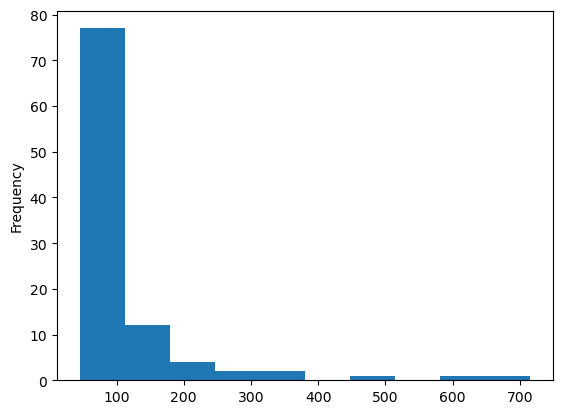

In [92]:
top_delays = (df['Min Delay'].sort_values(ascending=False)
              .head(100))

top_delays.plot(kind="hist")

           Min Delay   Min Gap   Vehicle
Min Delay   1.000000  0.959748 -0.002029
Min Gap     0.959748  1.000000  0.008775
Vehicle    -0.002029  0.008775  1.000000


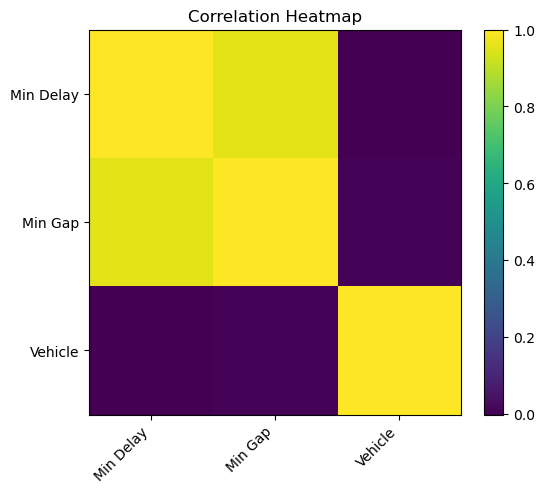

In [93]:
correlation_matrix = df_delay.corr(numeric_only=True)

# Print correlation matrix
print(correlation_matrix)

# (Optional) Visual correlation heatmap
plt.figure(figsize=(6, 5))
plt.imshow(correlation_matrix, cmap="viridis", aspect="auto")
plt.colorbar()
plt.title("Correlation Heatmap")
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha="right")
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

In [116]:
numeric_cols = ["Min Delay", "Min Gap"]
cor_matrix = df[numeric_cols].corr()
print(cor_matrix)

           Min Delay   Min Gap
Min Delay   1.000000  0.956349
Min Gap     0.956349  1.000000


In [94]:
# Correlation Matrix shows a relationship between Min Delay and Min Gap

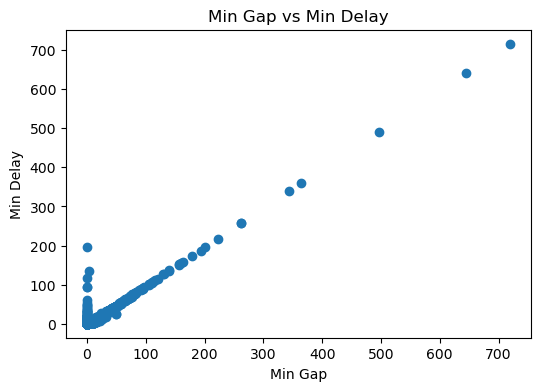

In [95]:
# Numeric Variables: Min Gap vs Min Delay
x_col = "Min Gap"  
y_col = "Min Delay"  

plt.figure(figsize=(6, 4))
plt.scatter(df[x_col], df[y_col])
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title(f"{x_col} vs {y_col}")
plt.show()

<Figure size 600x400 with 0 Axes>

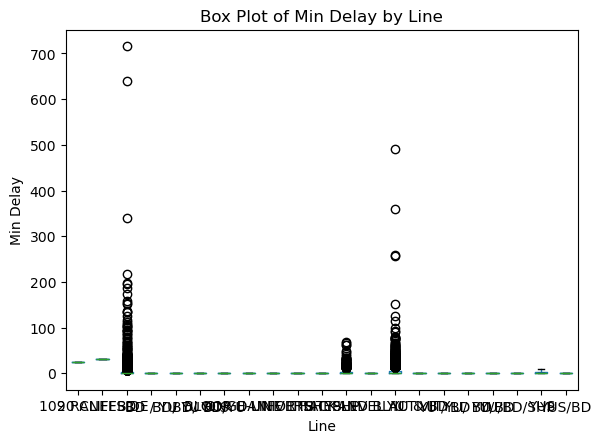

In [96]:
# Categorical Variables

cat_col = "Line"  
num_col = "Min Delay"      

plt.figure(figsize=(6, 4))
df.boxplot(column=num_col, by=cat_col, grid=False)
plt.title(f"Box Plot of {num_col} by {cat_col}")
plt.suptitle("")
plt.xlabel(cat_col)
plt.ylabel(num_col)
plt.show()

In [97]:
display(df_delay.describe())

,Date,Time,Min Delay,Min Gap,Vehicle
count,10157,10157,10157.000000,10157.000000,10153.000000
mean,2024-07-15 03:06:25.980112128,1900-01-01 13:26:59.923205888,7.898691,11.603918,5484.855215
min,2024-01-01 00:00:00,1900-01-01 00:00:00,2.000000,0.000000,0.000000
25%,2024-04-04 00:00:00,1900-01-01 08:35:00,4.000000,8.000000,5245.000000
50%,2024-07-18 00:00:00,1900-01-01 13:58:00,5.000000,9.000000,5546.000000
75%,2024-10-25 00:00:00,1900-01-01 18:18:00,8.000000,12.000000,5876.000000
max,2025-01-31 00:00:00,1900-01-01 23:59:00,716.000000,719.000000,9546.000000
std,NaN,NaN,15.666890,15.643212,764.733448


In [98]:
categorical_cols = ["Date", "Time", "Code", "Station"]

for col in categorical_cols:
    print(f"\nColumn: {col}")
    print("Number of unique values:", df_delay[col].nunique())
    print(df_delay[col].value_counts().head(10))  # Show top 10 most common categories


Column: Date
Number of unique values: 397
Date
2024-12-05    48
2024-03-22    47
2024-01-31    44
2024-04-29    43
2024-01-26    42
2024-01-23    41
2024-05-06    41
2024-01-19    40
2024-10-28    39
2024-11-20    39
Name: count, dtype: int64

Column: Time
Number of unique values: 1289
Time
1900-01-01 05:59:00    37
1900-01-01 05:54:00    29
1900-01-01 05:53:00    28
1900-01-01 05:50:00    27
1900-01-01 06:02:00    26
1900-01-01 05:48:00    26
1900-01-01 05:55:00    22
1900-01-01 16:55:00    21
1900-01-01 08:22:00    21
1900-01-01 07:57:00    21
Name: count, dtype: int64

Column: Code
Number of unique values: 115
Code
SUDP     1420
MUPAA     973
PUOPO     902
MUIR      635
SUO       627
MUSAN     444
SUUT      436
MUI       408
TUO       285
MUO       264
Name: count, dtype: int64

Column: Station
Number of unique values: 185
Station
KIPLING STATION       391
KENNEDY BD STATION    387
BLOOR STATION         385
EGLINTON STATION      354
FINCH STATION         341
DAVISVILLE STATION    2

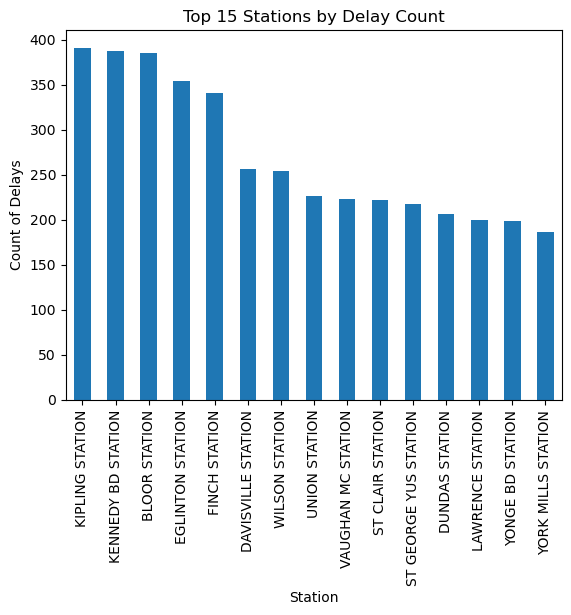

In [99]:
station_counts = df_delay["Station"].value_counts().head(15)

plt.figure()
station_counts.plot(kind="bar")
plt.title("Top 15 Stations by Delay Count")
plt.xlabel("Station")
plt.ylabel("Count of Delays")
plt.show()

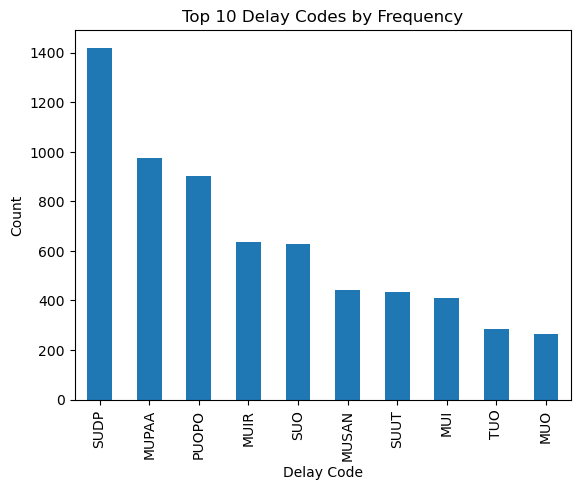

In [ ]:
delay_code_counts = df_delay["Code"].value_counts().head(10)

plt.figure()
delay_code_counts.plot(kind="bar")
plt.title("Top 10 Delay Codes by Frequency")
plt.xlabel("Delay Code")
plt.ylabel("Count")
plt.show()

C:\Users\jcp_2\AppData\Local\Temp\ipykernel_20864\398436252.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delay["Hour"] = df_delay["Time"].dt.hour


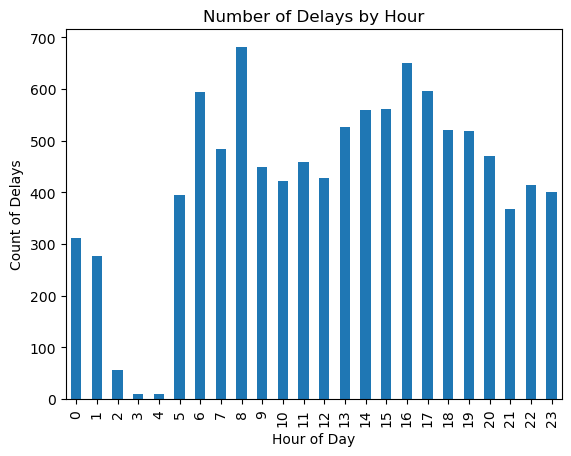

In [102]:
# Count how many delays per hour

df_delay["Hour"] = df_delay["Time"].dt.hour


hour_counts = df_delay["Hour"].value_counts().sort_index()

plt.figure()
hour_counts.plot(kind="bar")
plt.title("Number of Delays by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Count of Delays")
plt.show()

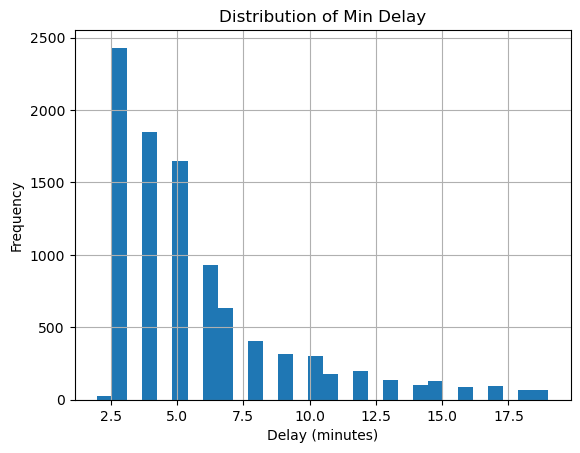

In [111]:
delay_filtered = df_delay[df_delay['Min Delay']<20]
plt.figure()
delay_filtered["Min Delay"].hist(bins=30)
plt.title("Distribution of Min Delay")
plt.xlabel("Delay (minutes)")
plt.ylabel("Frequency")
plt.show()

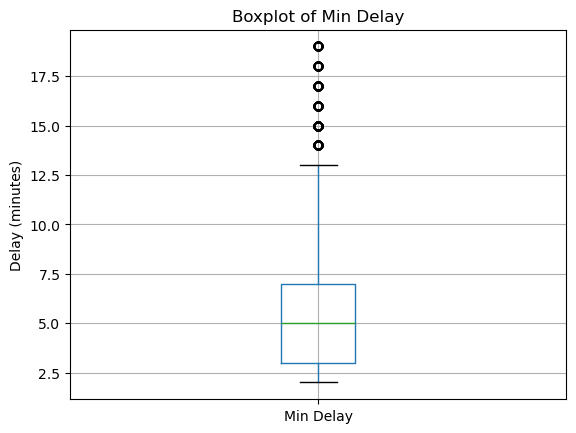

In [112]:
plt.figure()
delay_filtered.boxplot(column="Min Delay")
plt.title("Boxplot of Min Delay")
plt.ylabel("Delay (minutes)")
plt.show()

In [118]:
df_delay.groupby("Code")["Min Delay"].mean().sort_values(ascending=False).head(10)

Code
PUTTP    181.500000
PUTSM    129.500000
MUPR1     70.805556
MUEC      65.500000
MUPLA     58.000000
PUSZC     41.000000
MUPLB     40.966667
TUDOE     38.500000
SUBT      36.250000
PUSIS     32.285714
Name: Min Delay, dtype: float64